# Assignment 2



Write your Name and email below








**Exercise 1**

Start by importing pandas, numpy, maplotlib, and loading the data set.

The dataset has address

`url='https://github.com/amoreira2/Fin418/blob/main/assets/data/Assignment1.xlsx?raw=true'`

I strongly recommend you download first and look at the data set.

This file contains multiple sheets, you should use `read_excel` to get the data that contains the 49 value-weighted industry portfolios.

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df_ind`
    - Use "sheet_name" to select the desired excel sheet.
    - Use "skip_rows" to skip the initial rows before the data. you want the header, i.e. , the column names to be included! This will be a integer, i.e. just a number like 5
    - Figure out what is the code for missing value and change the option `na_values` appropriately. It will be in string format like that 'number'
    - If you look at the excel file you will see that there are other data sets stacked horizontally. Use the `usecols` option to select the range of columns you want imported


2. Change the name of the column with the date information to date

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. Call `df_ind.info()` so you check all the tasks were accomplished.

6. In the next cell, call `df_ind.head()`

In [7]:
# this imports the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

# this points to the location of the data
url = 'https://github.com/amoreira2/Fin418/blob/main/assets/data/Assignment1.xlsx?raw=true'

# Import the data
df_ind = pd.read_excel(
url,
sheet_name='49_Industry_Portfolios',
skiprows=6,
na_values=[-99.99, -999],
usecols="A:AX"
)

# Rename the column with date information
df_ind.rename(columns={df_ind.columns[0]: 'date'}, inplace=True)

# Convert the date column to datetime
df_ind['date'] = pd.to_datetime(df_ind['date'], format='%Y%m')

# Set date as the index
df_ind.set_index('date', inplace=True)

# Check the dataframe
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1069 entries, 1926-07-01 to 2015-07-01
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Agric   1069 non-null   float64
 1   Food    1069 non-null   float64
 2   Soda    625 non-null    float64
 3   Beer    1069 non-null   float64
 4   Smoke   1069 non-null   float64
 5   Toys    1069 non-null   float64
 6   Fun     1069 non-null   float64
 7   Books   1069 non-null   float64
 8   Hshld   1069 non-null   float64
 9   Clths   1069 non-null   float64
 10  Hlth    553 non-null    float64
 11  MedEq   1069 non-null   float64
 12  Drugs   1069 non-null   float64
 13  Chems   1069 non-null   float64
 14  Rubbr   1009 non-null   float64
 15  Txtls   1069 non-null   float64
 16  BldMt   1069 non-null   float64
 17  Cnstr   1069 non-null   float64
 18  Steel   1069 non-null   float64
 19  FabPr   625 non-null    float64
 20  Mach    1069 non-null   float64
 21  ElcEq   1069 non-nu

In [8]:
df_ind

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,2.37,0.12,NaN,-5.19,1.29,8.65,2.50,50.21,-0.48,8.08,...,7.70,1.94,-23.79,0.07,1.87,4.61,-0.54,2.89,-4.85,5.20
1926-08-01,2.23,2.68,NaN,27.03,6.50,16.81,-0.76,42.98,-3.58,-2.51,...,-2.38,4.88,5.39,-0.75,-0.13,11.83,2.57,5.30,-0.57,6.76
1926-09-01,-0.57,1.58,NaN,4.02,1.26,8.33,6.42,-4.91,0.73,-0.51,...,-5.54,0.06,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-3.14,-3.86
1926-10-01,-0.46,-3.68,NaN,-3.31,1.06,-1.40,-5.09,5.37,-4.68,0.12,...,-5.08,-2.64,-15.38,-2.20,-4.11,-11.82,-4.28,-5.74,2.07,-8.49
1926-11-01,6.75,6.26,NaN,7.29,4.55,0.00,1.82,-6.40,-0.54,1.87,...,3.84,1.60,4.67,6.52,4.33,-2.97,3.58,2.21,4.92,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-01,-5.28,2.47,-4.64,-2.07,-8.82,-4.11,-2.35,0.48,-1.98,1.23,...,-3.25,-3.62,0.61,0.99,-0.29,-0.83,2.28,3.91,-0.57,-2.13
2015-04-01,1.07,-0.23,-0.43,-0.52,5.94,9.25,2.62,-4.07,-2.41,-1.53,...,-1.72,-1.14,-1.20,-2.88,0.51,2.13,-1.78,-2.72,0.48,0.34
2015-05-01,3.43,2.82,0.20,2.00,1.28,-3.63,1.68,2.02,0.39,0.04,...,0.33,-3.06,1.42,0.53,1.56,2.61,4.64,0.68,2.07,0.84


**Exercise 2. Advanced date manipulation**

1. convert the date from the start of the month to end of the month.

2. call `df_ind.head()` and verify it works

**_Hint:_**

* Read this link: https://stackoverflow.com/questions/37354105/find-the-end-of-the-month-of-a-pandas-dataframe-series.
If you google "pandas end of month" that is the first thing that comes out. Read the answer and apply to your problem.

* you aready set date as index, so you cannot do stuff like `df_ind.date` or `df_ind['date']`  and have to adjust the code accordingly. Think about how to access the index.


In [9]:
# your code below
df_ind.index = df_ind.index.to_period("M").to_timestamp("M")
df_ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,2.37,0.12,NaN,-5.19,1.29,8.65,2.50,50.21,-0.48,8.08,...,7.70,1.94,-23.79,0.07,1.87,4.61,-0.54,2.89,-4.85,5.20
1926-08-31,2.23,2.68,NaN,27.03,6.50,16.81,-0.76,42.98,-3.58,-2.51,...,-2.38,4.88,5.39,-0.75,-0.13,11.83,2.57,5.30,-0.57,6.76
1926-09-30,-0.57,1.58,NaN,4.02,1.26,8.33,6.42,-4.91,0.73,-0.51,...,-5.54,0.06,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-3.14,-3.86
1926-10-31,-0.46,-3.68,NaN,-3.31,1.06,-1.40,-5.09,5.37,-4.68,0.12,...,-5.08,-2.64,-15.38,-2.20,-4.11,-11.82,-4.28,-5.74,2.07,-8.49
1926-11-30,6.75,6.26,NaN,7.29,4.55,0.00,1.82,-6.40,-0.54,1.87,...,3.84,1.60,4.67,6.52,4.33,-2.97,3.58,2.21,4.92,4.00


**Exercise 3. Importing risk-free rate**

1. In this same file there is another sheet with market returns and the risk-free rate. Import them as `df_rmrf` by following all the steps you did in the above two questions

2. Call `df_rmrf.info()` so you check all the tasks were accomplished.

3. In the next cell, call `df_rmrf.head()`

In [10]:
# your code below
df_rmrf = pd.read_excel(
url,
sheet_name='Market_proxy',
skiprows=5,
na_values=[-99.99, -999],
usecols="A:C"
)
df_rmrf.rename(columns={df_rmrf.columns[0]: 'date'}, inplace=True)
df_rmrf['date'] = pd.to_datetime(df_rmrf['date'], format='%Y%m')
df_rmrf.set_index('date', inplace=True)
df_rmrf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1073 entries, 1926-07-01 to 2015-11-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  1073 non-null   float64
 1   RF      1073 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


**Exercise 4. Constructing excess returns A**

1. for the industry `Agric`, construct the excess return by subtracting the risk-free rate RF from it.

2. compute the mean of this excess return.

3. print it along with the mean of the raw returns and the risk free rate to compare

In [11]:
# your code below
df_rmrf.index = df_rmrf.index.to_period("M").to_timestamp("M")

excess_agric = df_ind['Agric'] - df_rmrf['RF']
mean_excess_agric = excess_agric.mean()
mean_raw_agric = df_ind['Agric'].mean()
mean_rf = df_rmrf['RF'].mean()

print("Mean excess return (Agric - RF):", mean_excess_agric)
print("Mean raw return (Agric):", mean_raw_agric)
print("Mean risk-free rate (RF):", mean_rf)

Mean excess return (Agric - RF): 0.681889616463985
Mean raw return (Agric): 0.9639289055191769
Mean risk-free rate (RF): 0.2809878844361603


**Exercise 5. Constructing excess returns B**

1. construct excess returns for all portfolio by subtracting the risk-free rate from all of columns at the same time
2. name the new data frame `df_inde` ( for excess returns)

**_Hint:_**
* You can do that using the method `.subtract()` with the option axis to tell along which dimension

* Go ahead , google "pandas subtract" to see how this works

In [12]:
# your code below
df_inde = df_ind.subtract(df_rmrf['RF'], axis=0)
df_inde.info()
df_inde.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1073 entries, 1926-07-31 to 2015-11-30
Freq: ME
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Agric   1069 non-null   float64
 1   Food    1069 non-null   float64
 2   Soda    625 non-null    float64
 3   Beer    1069 non-null   float64
 4   Smoke   1069 non-null   float64
 5   Toys    1069 non-null   float64
 6   Fun     1069 non-null   float64
 7   Books   1069 non-null   float64
 8   Hshld   1069 non-null   float64
 9   Clths   1069 non-null   float64
 10  Hlth    553 non-null    float64
 11  MedEq   1069 non-null   float64
 12  Drugs   1069 non-null   float64
 13  Chems   1069 non-null   float64
 14  Rubbr   1009 non-null   float64
 15  Txtls   1069 non-null   float64
 16  BldMt   1069 non-null   float64
 17  Cnstr   1069 non-null   float64
 18  Steel   1069 non-null   float64
 19  FabPr   625 non-null    float64
 20  Mach    1069 non-null   float64
 21  ElcEq   10

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,2.15,-0.10,NaN,-5.41,1.07,8.43,2.28,49.99,-0.70,7.86,...,7.48,1.72,-24.01,-0.15,1.65,4.39,-0.76,2.67,-5.07,4.98
1926-08-31,1.98,2.43,NaN,26.78,6.25,16.56,-1.01,42.73,-3.83,-2.76,...,-2.63,4.63,5.14,-1.00,-0.38,11.58,2.32,5.05,-0.82,6.51
1926-09-30,-0.80,1.35,NaN,3.79,1.03,8.10,6.19,-5.14,0.50,-0.74,...,-5.77,-0.17,-8.10,0.02,-0.79,-1.98,0.49,-3.29,-3.37,-4.09
1926-10-31,-0.78,-4.00,NaN,-3.63,0.74,-1.72,-5.41,5.05,-5.00,-0.20,...,-5.40,-2.96,-15.70,-2.52,-4.43,-12.14,-4.60,-6.06,1.75,-8.81
1926-11-30,6.44,5.95,NaN,6.98,4.24,-0.31,1.51,-6.71,-0.85,1.56,...,3.53,1.29,4.36,6.21,4.02,-3.28,3.27,1.90,4.61,3.69


**Exercise 6. Drop missing observations**

You may notice that excess returns of some industries are not available at the beginning of the sample.

If we want all the industries to have same period of data in `df_inde`, we need to drop some observations.

Do the followings:

1. Use method `dropna` to drop rows in `df_inde` if **ANY** industry is missing.

2. After that, `print(df_inde.shape)` to see the changes in the length.

**_Hint_**
* when you call `dropna` function, use `axis` and `how` option to drop missing values if **ANY** industry is missing

In [13]:
# your code below
df_inde = df_inde.dropna(axis=0, how='any')
print(df_inde.shape)

(553, 49)


**Exercise 7. Moments**

We will now estimate the risk-premium in each of these portfolio and the covariance between these portfolios.

Do the followings:

1. using the method `mean` on the excess return data frame to obtain a vector of average excess returns.

2. Using `std` construct an estimator for each asset standard deviation.

2. use `cov` method to estimate the covariance of excess returns.

3. Discuss in each units these variables are



In [14]:
# your code below
muR = df_inde.mean()
print("Average excess returns:")
print(muR)

sigmaR = df_inde.std()
print("\nStandard deviation of excess returns:")
print(sigmaR)

SigmaR = df_inde.cov()
print("\nCovariance matrix of excess returns:")
print(SigmaR)

Average excess returns:
Agric    0.596926
Food     0.737450
Soda     0.747577
Beer     0.745371
Smoke    1.073165
Toys     0.368698
Fun      0.906347
Books    0.507468
Hshld    0.460524
Clths    0.689385
Hlth     0.687722
MedEq    0.631519
Drugs    0.733382
Chems    0.618879
Rubbr    0.609222
Txtls    0.657884
BldMt    0.597703
Cnstr    0.445660
Steel    0.303183
FabPr    0.288047
Mach     0.539186
ElcEq    0.751844
Autos    0.448156
Aero     0.757523
Ships    0.701121
Guns     0.883888
Gold     0.358282
Mines    0.592966
Coal     0.650868
Oil      0.614720
Util     0.496962
Telcm    0.555497
PerSv    0.221754
BusSv    0.520579
Hardw    0.470108
Softw    0.580416
Chips    0.618210
LabEq    0.598788
Paper    0.594069
Boxes    0.591808
Trans    0.559349
Whlsl    0.564123
Rtail    0.663906
Meals    0.643382
Banks    0.580362
Insur    0.654503
RlEst    0.147541
Fin      0.701230
Other    0.071320
dtype: float64

Standard deviation of excess returns:
Agric     6.502605
Food      4.544203
So

In [15]:
ERe = df_inde
ERe.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1969-07-31,-9.24,-7.49,-4.07,-2.60,-5.29,-8.33,-10.72,-11.59,-3.99,-12.58,...,-3.67,-13.02,-10.47,-8.81,-10.88,-6.80,-10.73,-13.79,-10.19,-12.55
1969-08-31,4.08,4.05,4.97,6.17,3.49,5.89,11.03,9.53,4.25,2.01,...,5.61,5.08,5.81,7.78,8.36,11.77,8.27,14.97,8.56,7.07
1969-09-30,0.52,-1.23,4.60,-1.55,3.52,1.25,0.02,-1.27,-1.16,-3.32,...,0.56,-2.23,-0.28,-1.37,-1.64,-3.73,6.39,-4.14,-2.91,-4.81
1969-10-31,15.62,7.39,6.21,11.03,11.82,5.81,12.44,6.90,5.79,6.71,...,2.87,4.16,10.60,5.63,8.37,10.14,5.10,3.19,9.55,0.11
1969-11-30,-2.82,-1.24,-5.44,-3.34,0.09,-8.80,-4.04,-4.41,-2.95,-3.61,...,-2.48,-8.45,-7.23,-4.64,-2.99,-8.58,-5.42,-6.96,-7.22,-4.08


In [16]:
CovRe = df_inde.cov()
CovRe.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,42.283870,13.895412,14.346336,15.357792,13.991825,22.845450,25.603373,20.651770,14.086705,22.358837,...,18.503279,21.685230,21.671474,18.238354,22.112166,19.847363,18.478277,25.544071,23.456189,22.984056
Food,13.895412,20.649781,17.140947,16.638740,16.557008,17.881736,19.822838,16.760152,14.755665,19.149684,...,14.987057,15.854831,16.244361,17.339216,19.046044,17.648075,17.695633,18.340478,16.088807,17.227995
Soda,14.346336,17.140947,44.390220,21.477687,16.788400,22.415114,27.409492,21.478002,20.069215,23.433387,...,19.693232,19.621829,20.037168,20.471794,23.376182,22.613361,20.757661,24.966746,21.355187,20.779437
Beer,15.357792,16.638740,21.477687,28.416039,15.240504,20.739552,22.459002,17.438402,18.277620,19.461693,...,15.776708,17.770795,17.317937,18.446586,21.071838,18.995298,17.669503,19.610670,18.094191,20.026403
Smoke,13.991825,16.557008,16.788400,15.240504,39.239493,16.990493,18.312546,14.179440,14.601341,15.830464,...,15.251782,13.663776,16.638705,14.092910,16.771839,16.165358,15.322632,16.042678,14.719785,18.066246


**Exercise 8. Plotting**


Choose a couple of industry portfolios to plot their time-series.

Use the behavior of these two assets to discuss an important economic event in US history

as you discuss make sure to use the magnitudes in your discussion to show that you do understand what this data means



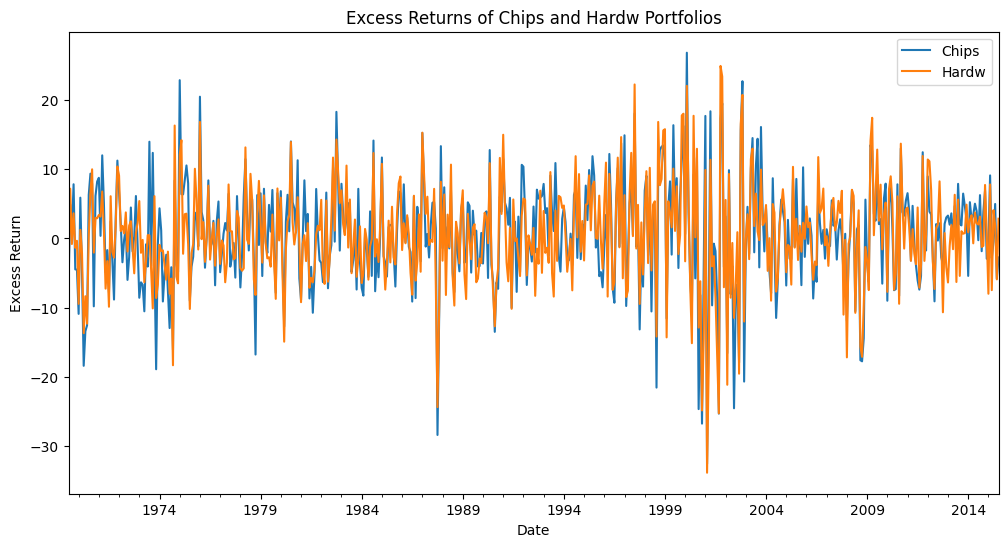

In [17]:
# your code below
import matplotlib.pyplot as plt

industries = ["Chips", "Hardw"]
df_inde[industries].plot(figsize=(12,6))
plt.title("Excess Returns of Chips and Hardw Portfolios")
plt.ylabel("Excess Return")
plt.xlabel("Date")
plt.legend(industries)
plt.show()

**Exercise 9. Cumulative returns**


Choose two industry portfolios to plot the cumulative returns over time.

You can plot for the whole period or just a subperiod.

You should explain what the numbers mean in terms of how much money people would have if they had invested in these assets

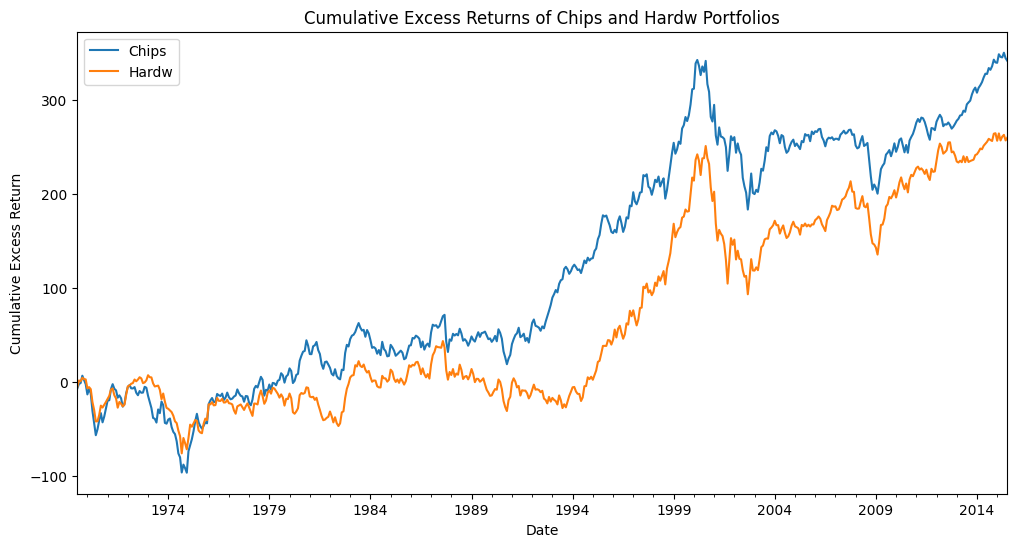

In [18]:
df_inde[industries].cumsum().plot(figsize=(12,6))
plt.title("Cumulative Excess Returns of Chips and Hardw Portfolios")
plt.ylabel("Cumulative Excess Return")
plt.xlabel("Date")
plt.legend(industries)
plt.show()